# Base Line Model  
这个是一个基本模型，手动构筑model，没有使用迁移学习  
没有使用early stopping


In [1]:
# ! pip install sklearn

In [1]:
import keras
import os
import numpy as np
import pickle
import tensorflow as tf
from keras import layers
from keras import models
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.preprocessing import image_dataset_from_directory
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
if os.getcwd().split('/')[-1]=='baseline_model':
    os.chdir('..')
os.getcwd()

'/workspace/python'

In [3]:
classes = ['zero', 'one', 'two', 'three', 'four',
           'five', 'six', 'seven', 'eight', 'nine']
IMAGE_SIZE=100
BATCH_SIZE=32
class_num=len(classes)

In [4]:
base_path = "hand_sign_digit_data"
model = tf.keras.models.Sequential()
# 32 is kernel count    (3,3) is kernel dimension
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
# 这个是在最后部分使用dropout 部分note失活，也可以在每一层都使用dropout。dropout的目的是防止过拟合
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0

In [6]:
# base_learning_rate=0.001
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [6]:
train_dir = os.path.join(base_path, 'train')
validation_dir = os.path.join(base_path, 'validation')
test_dir = os.path.join(base_path, 'test_old')

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
#     zoom_range=0.2,
#     shear_range=0.2,
    horizontal_flip=True,
)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 1675 images belonging to 10 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 422 images belonging to 10 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=52,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=14)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
52/52 [==============================] - 6s 117ms/step - loss: 2.3125 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.0995
Epoch 2/50
52/52 [==============================] - 6s 113ms/step - loss: 2.3003 - acc: 0.0962 - val_loss: 2.2907 - val_acc: 0.1469
Epoch 3/50
52/52 [==============================] - 6s 113ms/step - loss: 2.1380 - acc: 0.2252 - val_loss: 1.8366 - val_acc: 0.3957
Epoch 4/50
52/52 [==============================] - 6s 113ms/step - loss: 1.7374 - acc: 0.3737 - val_loss: 1.4890 - val_acc: 0.4479
Epoch 5/50
52/52 [==============================] - 6s 113ms/step - loss: 1.3752 - acc: 0.5064 - val_loss: 1.1207 - val_acc: 0.6469
Epoch 6/50
52/52 [==============================] - 6s 113ms/step - loss: 1.1562 - acc: 0.5940 - val_loss: 0.8420 - val_acc: 0.7559
Epoch 7/50
52/52 [==============================] - 6s 113ms/step - loss: 0.9808 - acc: 0.6677 - val_loss: 0.6910 - val_acc: 0.8199


In [13]:
model_file_name='baseline_model_2020-11-16.h5'
model.save(model_file_name)

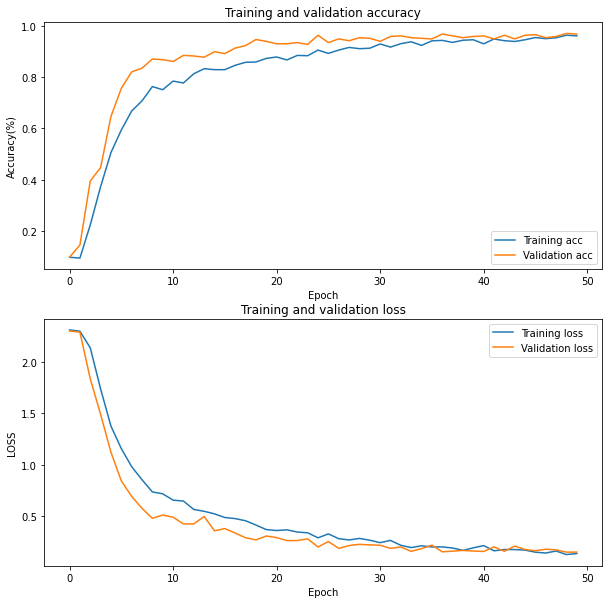

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,10))
ax=plt.subplot(2,1,1)
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylabel("Accuracy(%)")
plt.xlabel("Epoch")

ax=plt.subplot(2,1,2)
plt.plot(loss, label='Training loss')
plt.plot(val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.ylabel("LOSS")
plt.xlabel("Epoch")
plt.show()

# Model预测

In [15]:
del model

In [16]:
model=load_model(model_file_name)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0

In [14]:
test_dataset = image_dataset_from_directory(test_dir,
                                            shuffle=True,
                                            batch_size=BATCH_SIZE,
                                            image_size=(IMAGE_SIZE,
                                                        IMAGE_SIZE))

Found 40 files belonging to 10 classes.


In [15]:
images,labels=next(iter(test_dataset))

In [16]:
len(images),labels

(32,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([6, 3, 2, 1, 8, 8, 5, 5, 2, 3, 1, 4, 4, 3, 6, 3, 7, 9, 1, 4, 3, 4,
        0, 4, 2, 9, 8, 7, 6, 6, 8, 7], dtype=int32)>)

In [17]:
predictions = model.predict_on_batch(images).flatten()

In [18]:
pred_result=[]
for i in range(BATCH_SIZE):
    pred_result.append(predictions[i*class_num:(i+1)*class_num].argmax())

In [19]:
print("Predict Accuracy={}".format(accuracy_score(labels, pred_result)))

Predict Accuracy=0.6875


Correct rate=68.75%


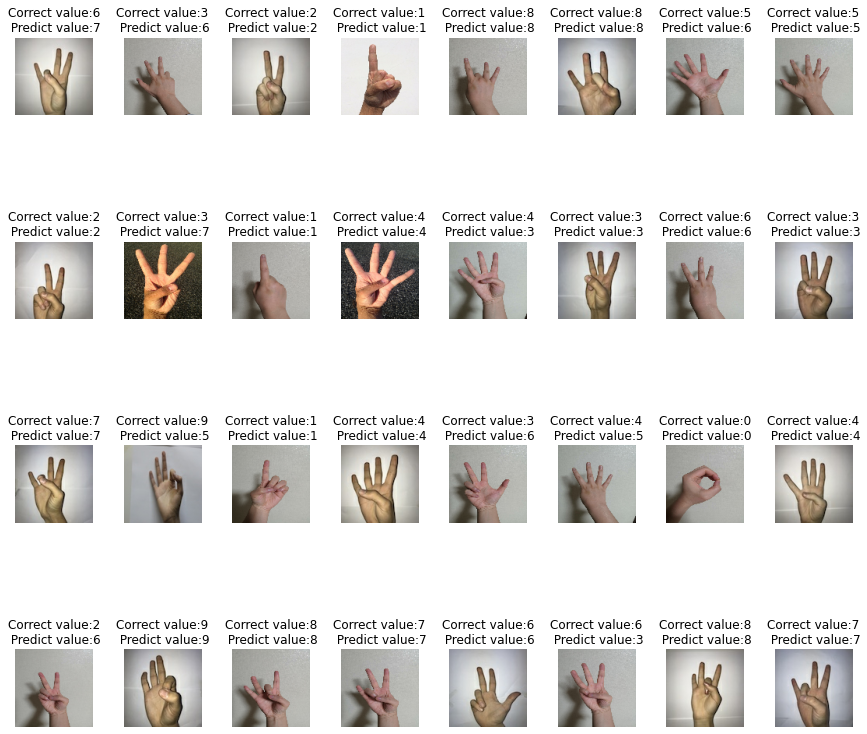

In [23]:
plt.figure(figsize=(15,15))
# 设定空白处 间隔大小
plt.subplots_adjust(wspace=0.4, hspace=0)
count=0
for i in range(BATCH_SIZE):
    ax=plt.subplot(4,8,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')
    Correct_value=labels[i].numpy().astype('uint8')
    Predict_value=pred_result[i]
    plt.title("Correct value:{}\n Predict value:{}".format(Correct_value,Predict_value))
    if Correct_value == Predict_value:
        count += 1
print("Correct rate={}%".format(round(count*1.0/BATCH_SIZE*100,2)))

### Save model and history data

In [27]:
history_name = 'baseline_model_history.pickle'
path = os.path.join(os.getcwd(), 'baseline_model', history_name)


def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj, f)


pickle_dump(history.history, path)

# 指定一张图片进行预测

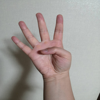

In [25]:
from PIL import Image, ImageFilter
im=Image.open('hand_sign_digit_data/test_old/4/qiu-4-1.jpg')
im1=im.resize((100,100))
im1

In [26]:
print(im.format, im.size, im.mode)
print(im1.format, im1.size, im1.mode)

JPEG (1080, 1440) RGB
None (100, 100) RGB


In [27]:
im1_arr=np.asarray(im1)
im1_arr.shape

(100, 100, 3)

In [28]:
im1_arr=im1_arr/225.0

In [29]:
# print(images[0].shape)
# plt.imshow(images[0].numpy().astype('uint8'))

In [30]:
pred=model.predict(np.expand_dims(im1_arr,0))
pred,print(pred.argmax())

7


(array([[4.9898280e-03, 6.0645667e-05, 5.8491644e-02, 2.1113473e-01,
         1.1981471e-01, 6.7954916e-03, 1.2960503e-01, 3.3244655e-01,
         9.3678974e-02, 4.2982377e-02]], dtype=float32),
 None)